Matriz A = 
coeficientes a =  [ 0.    0.5  -0.01  0.  ]


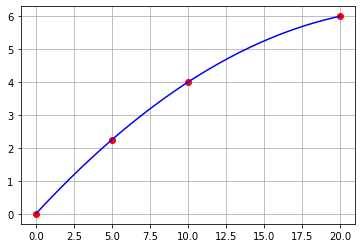

polinomio interpolador
       2
-0.01 x + 0.5 x
altura em 5m = 2.25


In [ ]:
#interpolação polinomial

import numpy as np
import matplotlib.pyplot as plt

x = np.array([0, 10, 20, 5])
y = np.array([0, 4, 6, 2.25])#fx

dim = len(x)



A = np.zeros((dim,dim), dtype=np.float64)
A[0:dim, 0] = 1



for j in range(1, dim):
  for i in range(0, dim):
    A[i, j] = x[i]**j

print("Matriz A = ")




alpha = np.linalg.solve(A, y)
print("coeficientes a = ",alpha)


plt.plot(x, y ,"ro")
data = np.linspace(min(x),max(x), 100)
a = alpha[::-1].copy()
p = np.poly1d(a)
plt.plot(data , p(data), color = "blue")
plt.grid()
plt.show()

print("polinomio interpolador")
print(p)

p5m = -(0.01)*(5)**2 + 0.5*(5)
print("altura em 5m =", p5m)






(x) [ 0  3  5  8 13]
(y) [  0.     68.58  116.738 189.89  302.666]
posição em t=10, 236.17816464730288 m
24.99960000666655


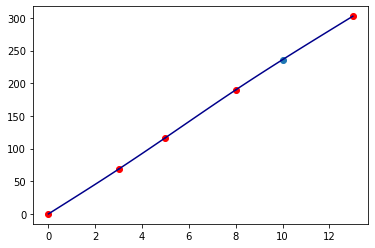

In [ ]:
#interpolação Spline
import sympy 
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0, 3, 5, 8, 13])

y = np.array([0.0, 68.58, 116.738, 189.89, 302.666])#fx

dim = len(x)


h = np.zeros(0)
for j in range(1, dim):
  h = np.append(h, (x[j]) - (x[j-1]) )




print("(x)", x)
print("(y)", y)




A = np.zeros((dim,dim), dtype=np.float64)
A[0,0] = 1
A[dim-1, dim-1] = 1
for i in range(1, dim-1): 
  A[i, i-1] =  h[i-1] #i-1
  A[i, i+1] =  h[i] #i
  A[0,1] = 0

for i in range(1, dim-1): 
  A[i, i] =  2*(h[i-1] + h[i])


#print("Matriz(A)")
#print(A)


#AX = B
vec = np.zeros(1)
for i in range(2, dim):
  vec = np.append(vec, ( ( 3 / h[i-1] )*(y[i] - y[i-1]) ) - ( ( 3 / h[i-2] )*(y[i-1] - y[i-2]) ) )

vec = np.append(vec, 0)


c = np.linalg.solve(A, vec) #Resolve Sistema Linear
#print("(c)",c)


#define bj e dj com os valores do vetor c
b = np.zeros(0)
d = np.zeros(0)



k=0
for j in range(0, dim-1):
  k=k+1
  b = np.append(b, ( 1 / h[j])*(y[k] - y[j]) - (h[j] / 3)*(2*c[j] + c[k]))
  d = np.append(d, (c[k] - c[j]) / (3*h[j]) )



#print("(b)", b)
#print("(d)", d)


fig,ax = plt.subplots()
ax.scatter(x, y, color = 'red')
for i in range(0, dim-1):
  xs = np.linspace(x[i], x[i+1], 100)
  splx =  y[i] + b[i]*(xs - x[i]) + c[i]*((xs - x[i])**2) + d[i]*((xs - x[i])**3)
  ax.plot(xs, splx, color =  "darkblue")


splx10 =  y[i] + b[i]*(10 - x[i]) + c[i]*((10 - x[i])**2) + d[i]*((10 - x[i])**3)
print("posição em t=10,", splx10, "m")
ax.scatter(10, splx10)

ad = (300+0.0001 - 0+0.0001)/(12+ 0.0001 - 0+0.0001)
print(ad)



In [ ]:
# integração numérica Regra 1/3 de Simpson repetida
import numpy as np
from math import e
import matplotlib.pyplot as plt
m = 68
g = 9.81
beta = 12.5

x = np.linspace(0,2,21)
print(x)
f = ( m*g/beta )*( 1 - e**((-beta*x)/m) )

dim = len(x)
h = x[1] - x[0] 


j1 = 0
j2 = 0 
soma = 0
for i in range(0, dim-1, 2):
  j1 = i+1
  j2 = i+2
  soma =  soma + (f[i] + 4*f[j1] + f[j2])

I = (h/3)*soma

print('integral (integração numérica Regra 1/3 de Simpson repetida)',I)

x = np.linspace(0,10,21)
print(x)
f = ( m*g/beta )*( 1 - e**((-beta*x)/m) )

dim = len(x)
h = x[1] - x[0] 


j1 = 0
j2 = 0 
soma = 0
for i in range(0, dim-1, 2):
  j1 = i+1
  j2 = i+2
  soma =  soma + (f[i] + 4*f[j1] + f[j2])

I2 = (h/3)*soma

print('integral (integração numérica Regra 1/3 de Simpson repetida)',I2)
yf - yi = S

yf = I + 3000 
print("posição em t(2) = ", yf)
yf2 = I2 + 3000 
print("posição em t(10) =" , yf2)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2. ]
integral (integração numérica Regra 1/3 de Simpson repetida) 17.4212780649907
[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10. ]
integral (integração numérica Regra 1/3 de Simpson repetida) 289.5389218106228
posição em t(2) =  3017.4212780649905
posição em t(10) = 3289.538921810623
